In [ ]:
#@title Importamento das bibliotecas e Salvamento dos dados coletados e construção do dataframe
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import scipy.stats as stats

with open("data.txt", "r") as datas:
  data_list = list(map(float, datas.read().split()))
df = pd.DataFrame(data_list, columns=["Tempo de resposta (em segundos)"])
df

,Tempo de resposta (em segundos)
0,1.09081
1,0.96804
2,1.58838
3,0.75088
4,1.47238
...,...
995,1.91768
996,1.55088
997,1.16803
998,1.13794


# Medidas de dispersão, variabilidade e centralidade

In [ ]:
# Medidas de dispersão, variabilidade e centralidade
data_median = [statistics.median(data_list)]
data_mean = [statistics.mean(data_list)]
data_variance = [statistics.variance(data_list)]
data_stdev = [statistics.stdev(data_list)]
data_coev = [data_stdev[0]/data_mean[0]]
data_mode = [statistics.mode(data_list)]
dt = pd.DataFrame(list(zip(data_mean, data_median, data_mode, data_variance, data_stdev, data_coev)), columns=["Media","Mediana", "Moda", "Variância","Desvio padrão","Coef. Variação"])
dt

,Media,Mediana,Moda,Variância,Desvio padrão,Coef. Variação
0,1.130899,1.11973,0.78624,0.100679,0.317299,0.280573


# Boxplot da amostra. 


In [ ]:
# boxplot
print('Boxplot dos dados coletados\n')
fig = px.box(data_frame=data_list, y=[0], width=300, height=500)
fig.show()

# achar outliers
lower_outlier = []
upper_outlier = []
for i in range(len(data_list)):
  if data_list[i] < 0.31735:
    lower_outlier.append(data_list[i])
  if data_list[i] > 1.94949:
    upper_outlier.append(data_list[i])
print(f'\nOutliers superiores: {" ".join(map(str,upper_outlier))}\n\nOutliers inferiores: {" ".join(map(str,lower_outlier))}')

Boxplot dos dados coletados




Outliers superiores: 2.28593 2.15548 2.10064

Outliers inferiores: 0.17379 0.23519 0.24064 0.22403 0.2494 0.24799


# Testes de comprovação que é uma distribuição normal.

In [ ]:
#@title Teste anderson-darling
stats.anderson(data_list)


Fazendo o teste de Anderson-Darling para saber se a amostra segue uma distribuição normal.



AndersonResult(statistic=0.466368929219243, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.13089855, scale=0.3172993721076949)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
#@title Teste por p-valor
print('Para comprovação que os dados correspondem a uma normal, faremos um teste de hipótese levando em conta o p-valor que será calculado.\n')

print('Demonstração da distribuição normal por p-valor:\nHo = é Normal\nHa = não é normal\nα = 0.05\nDessa forma, vamos calcular o p-valor e teremos dois casos, p-valor > α (aceitamos a Ho e rejeitamos Ha), p-valor < α (aceitamos Ha e rejeitamos Ho).\n')
k, p = stats.normaltest(data_list)


print('Para calcular o p-valor faremos o uso da função normaltest que retornará o resultado.')
print(f'Conclusão: Verifica-se o p-valor = {p:.3f}. Logo, o p-valor é maior que α, assim, aceitamos hipótese nula e concluimos que a distribuição é normal.')


Para comprovação que os dados correspondem a uma normal, faremos um teste de hipótese levando em conta o p-valor que será calculado.

Demonstração da distribuição normal por p-valor:
Ho = é Normal
Ha = não é normal
α = 0.05
Dessa forma, vamos calcular o p-valor e teremos dois casos, p-valor > α (aceitamos a Ho e rejeitamos Ha), p-valor < α (aceitamos Ha e rejeitamos Ho).

Para calcular o p-valor faremos o uso da função normaltest que retornará o resultado.
Conclusão: Verifica-se o p-valor = 0.239. Logo, o p-valor é maior que α, assim, aceitamos hipótese nula e concluimos que a distribuição é normal.


Além da verificação pelo p-valor, verificaremos o comportamento e curvatura do gráfico de histograma, caso tenha um formato de sino caracteriza-se como uma distribuição normal.



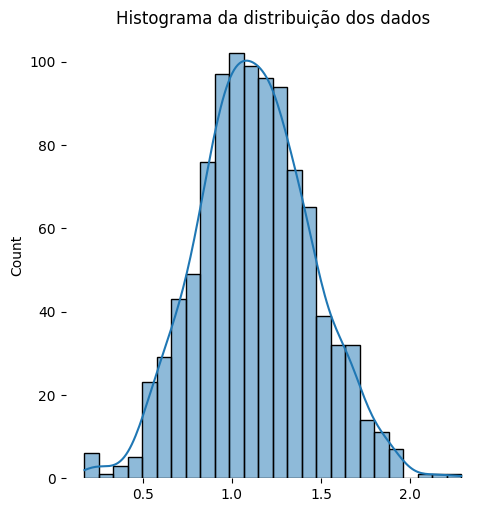


Conclusão: Pela característica e comportamento do gráfico (curva em forma de sino), se conclui que é uma distribuição normal.


In [ ]:
#@title Teste por visualização de histograma
print('Além da verificação pelo p-valor, verificaremos o comportamento e curvatura do gráfico de histograma, caso tenha um formato de sino caracteriza-se como uma distribuição normal.\n')
sns.displot(data_list, kde=True)
plt.title("Histograma da distribuição dos dados")
plt.box(False)
plt.show()
print("\nConclusão: Pela característica e comportamento do gráfico (curva em forma de sino), se conclui que é uma distribuição normal.")

# Teste de hipótese: O algoritmo possui um tempo médio de resposta de até 1.15s.

In [ ]:
print('Verificado que é uma normal, realizaremos o teste de hipótese:\nHo = (tempo médio é <= 1.15s)\nHa = (tempo médio > 1.15s)\n')
trust = 0.05 
# cálculo  t-student
x = data_mean[0]
u = 1.15
σ = data_stdev[0]
n = 1000
print('Como o desvio padrão populacional é desconhecido, faremos o teste pela fórmula de t student, utilizaremos também a tabela de distribuição normal.\nPara comprovação da nossa hipótese utilizaremos o nivel de significância de 5%. Conferindo na tabela verificamos um valor t = 1.960.\nDessa forma, para aceitação da hipótese nula é necessário que o valor obtido pela forma t student seja menor que o valor t crítico, que é o valor obtido na tabela.\n')
t = (x - u) / (σ / (n**0.5))
print(f'Conclusão: Como o valor de t student obtido = {t:.3f} é menor que o valor t crítico obtido da tabela de distribuição t = 1.960, aceitamos a hipótese nula e rejeitamos a alternativa, e assim, concluimos que o tempo médio de resposta do algoritmo é menor ou igual a 1.15s.')

Verificado que é uma normal, realizaremos o teste de hipótese:
Ho = (tempo médio é <= 1.15s)
Ha = (tempo médio > 1.15s)

Como o desvio padrão populacional é desconhecido, faremos o teste pela fórmula de t student, utilizaremos também a tabela de distribuição normal.
Para comprovação da nossa hipótese utilizaremos o nivel de significância de 5%. Conferindo na tabela verificamos um valor t = 1.960.
Dessa forma, para aceitação da hipótese nula é necessário que o valor obtido pela forma t student seja menor que o valor t crítico, que é o valor obtido na tabela.

Conclusão: Como o valor de t student obtido = -1.904 é menor que o valor t crítico obtido da tabela de distribuição t = 1.960, aceitamos a hipótese nula e rejeitamos a alternativa, e assim, concluimos que o tempo médio de resposta do algoritmo é menor ou igual a 1.15s.


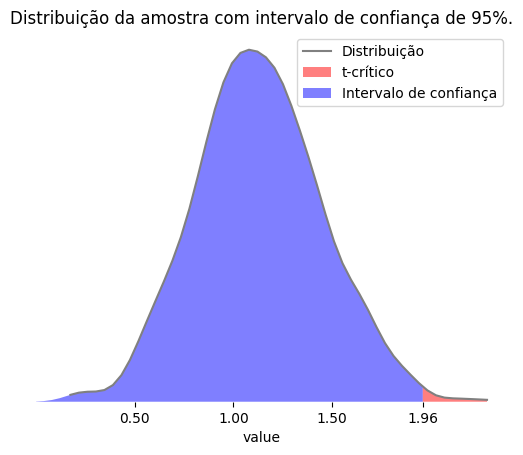

In [ ]:
#@title Gráfico teste de hipótese
dist = data_list
kde = stats.gaussian_kde(dist)
pos = np.linspace(min(dist), max(dist))
x = [0.5, 1, 1.5, 1.96]
plt.plot(pos, kde(pos), color="grey")
shade = np.linspace(1.960,max(dist))
shade2 = np.linspace(0,1.960)
plt.fill_between(shade,kde(shade), alpha=0.5, facecolor="red")
plt.fill_between(shade2, kde(shade2), alpha=0.5, facecolor="blue")

plt.ylim(0,None)
plt.title("Distribuição da amostra com intervalo de confiança de 95%.")
plt.xlabel("value")
plt.box(False)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.legend(["Distribuição","t-crítico","Intervalo de confiança"], loc=0)
plt.xticks(x)
plt.show()